# Step 01: Linear Regression 

2. Separate x(Gender, Height) and y (y=Weight)
3. Train = 70%, Test = 30%
4. Apply Linear Regression
5. Evaluate the Model (Testing and training Accuracy, MSE for testing)
6. Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
7. Evaluate the Model (Testing and training Accuracy, MSE for testing)
8. Compare KNN & Linear regression with the KNN model and Linear regression as well.


In [1]:
import pandas as pd #for data analysis
import numpy as np # working with numerical values
import matplotlib.pyplot as plt#for data visualizatin
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#ignoring warning message
from sklearn.model_selection import train_test_split as tts # split out data as train and test set
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #Mean Absolute Error(MAE) is the mean size of the mistakes in collected predictions


In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df1 = df.copy()
df2 = df.copy()

# Work from here..

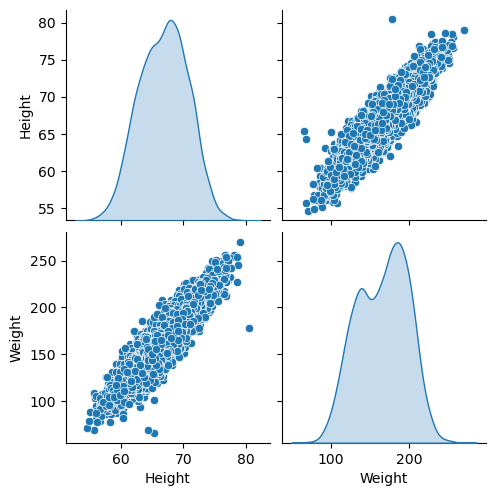

In [4]:
sns.pairplot(data=df, diag_kind='kde')

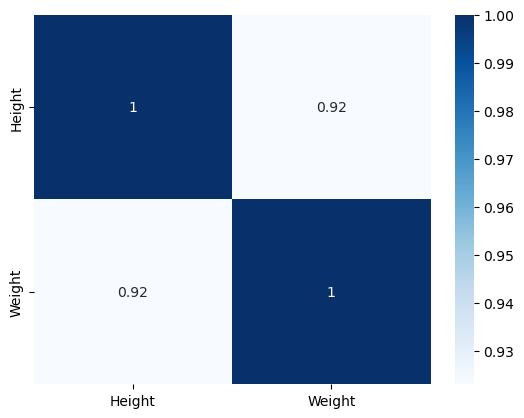

In [5]:
sns.heatmap(df[['Gender', 'Height', 'Weight']].corr(), cmap='Blues', annot=True)
plt.show()

In [6]:
x=df.drop(['Weight'], axis=1)
y=df[['Weight']]

In [7]:
x.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [8]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x['Gender']=lb.fit_transform(x["Gender"])

In [10]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [11]:
xtrain,xtest,ytrain,ytest=tts(x,y, test_size=0.30, random_state=1)

In [12]:
xtrain.head()

,Gender,Height
1277,1,72.385301
5361,0,60.960147
5728,0,69.119292
4276,1,68.271050
3112,1,64.991405


In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [14]:
y_pred=reg.predict(xtest)
y_pred

array([[143.83013436],
       [197.53417989],
       [184.63515112],
       ...,
       [160.7078525 ],
       [186.82852694],
       [201.4226542 ]])

In [15]:
reg.score(xtest, ytest)

0.905995960709116

In [16]:
reg.score(xtrain, ytrain)

0.8972135459668118

In [17]:
test_mse=mean_squared_error(ytest,reg.predict(xtest))
test_mse

99.67250998070034

In [18]:
training_mse=mean_squared_error(ytrain,reg.predict(xtrain))
training_mse

104.03843190905903

In Linear regression, we find lines that best describe given data points. Many lines can describe given data points, but which line describes it best can be found using MSE.

The MSE decreases as the data points are more in line with the regression line, indicating less error in the model. A model with fewer errors yields more accurate predictions.

If the MSE is high, the data points are spread out quite a bit from the center moment, while a low value implies the opposite. When your data points cluster tightly around their mean, the MSE will be modest (mean). It shows that your data values are distributed normally, that there is no skewness, and most importantly, that there are fewer errors, where errors are defined as how far your data points are from the mean.

Lesser MSE => Error is less => Estimator is superior


In [19]:
r2_score(ytest, (reg.predict(xtest)))

0.905995960709116

# KNN Regressor

2. Separate x and (y=Gender)
3. Train = 70%, Test = 30%
4. Apply KNN Classifier 
5. Evaluate the Model by only Accuracy.
6. Apply KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [20]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


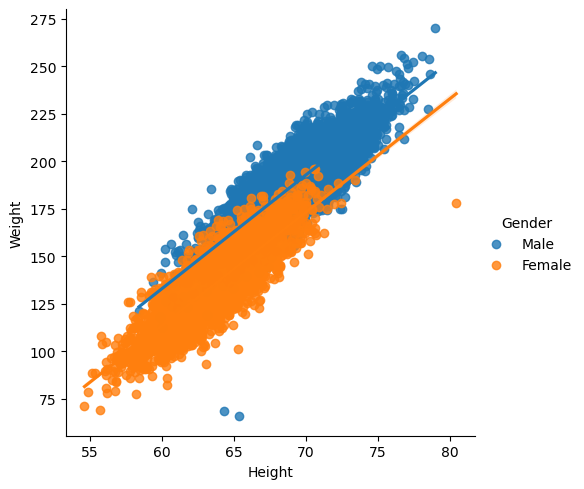

In [21]:
sns.lmplot(x='Height', y="Weight", hue='Gender', data=df1)
plt.show()

In [22]:
x=df1.drop(['Weight'], axis=1)
y=df1[['Weight']]

In [23]:
x

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
8550,Female,60.483946
8551,Female,63.423372
8552,Female,65.584057
8553,Female,67.429971


In [24]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x['Gender']=lb.fit_transform(x["Gender"])

In [25]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
knn=KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [28]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [29]:
knn.predict([[1, 73.847017]])

array([[222.24972316]])

In [30]:
knn.predict(xtest)

array([[150.1761117 ],
       [197.46276978],
       [179.03501546],
       ...,
       [160.26227546],
       [180.65461322],
       [200.56451578]])

In [31]:
from sklearn.metrics import r2_score
r2_score(ytest,pred2)

NameError: name 'pred2' is not defined

# KNN Classification

In [ ]:
df2.head()

In [ ]:
x=df2.drop(['Weight'], axis=1)
y=df2['Weight']

In [ ]:
dummies=pd.get_dummies(x, columns=['Gender'], drop_first=True)
dummies.head()

In [ ]:
x.drop(['Gender'], axis=1)
x=pd.concat([dummies], axis=1)
x.tail()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
x[['Height']]=scaler.fit_transform(x[['Height']])
x.head()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=100, weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

In [ ]:
xtrain,xtest,ytrain,ytest=tts(x,y, test_size=0.30, random_state=1)


In [ ]:
classifier.fit(xtrain,ytrain)

ValueError: Unknown label type: 'continuous'

This error usually occurs when we attempt to use sklearn to fit a classification model like regression and the values that we use for the response variable are continuous instead of categorical.